<a href="https://colab.research.google.com/github/yogendra1109/Credit_card-_lead_predication/blob/main/credit_card_lead_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_path = '/content/drive/My Drive/Hackathon/train5.csv'
test_path = '/content/drive/My Drive/Hackathon/test5.csv'
sample_path = '/content/drive/My Drive/Hackathon/sample5.csv'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample = pd.read_csv(sample_path)

In [5]:
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [6]:
test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [9]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
train.shape

(245725, 11)

In [11]:
test.shape

(105312, 10)

In [12]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [13]:
train = train.fillna('None')
test = test.fillna('None')

In [14]:
data = train.duplicated()

In [15]:
data.sum()

0

In [16]:
data_1 = test.duplicated()
data_1.sum()

0

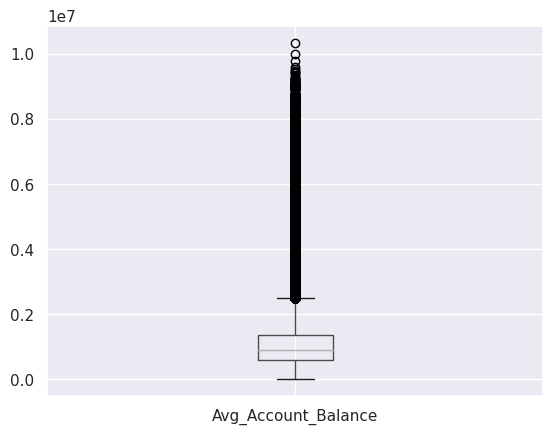

In [17]:
train.boxplot(column = ['Avg_Account_Balance'])
plt.show()

In [18]:
for i in train:
    print(f'{i} unique values {train[i].unique()}')

ID unique values ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']
Gender unique values ['Female' 'Male']
Age unique values [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23]
Region_Code unique values ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']
Occupation unique values ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']
Channel_Code unique values ['X3' 'X1' 'X2' 'X4']
Vintage unique values [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37

In [19]:
Train = train.drop(["Is_Lead"], axis=1)
Test = test
Train_Is_Lead = train["Is_Lead"]

In [20]:
Train_categorical = Train.select_dtypes(exclude = ['int64'])
Test_categorical = Test.select_dtypes(exclude = ['int64'])

Train_numerical = Train.select_dtypes(include = ['int64'])
col_names_Train = Train_numerical.columns.values.tolist()

Test_numerical = Test.select_dtypes(include = ['int64'])
col_names_Test = Test_numerical.columns.values.tolist()

In [21]:
Train_numerical.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


<ipython-input-22-3c07abb9ca29>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(Train_numerical['Avg_Account_Balance'], bw=0.5)


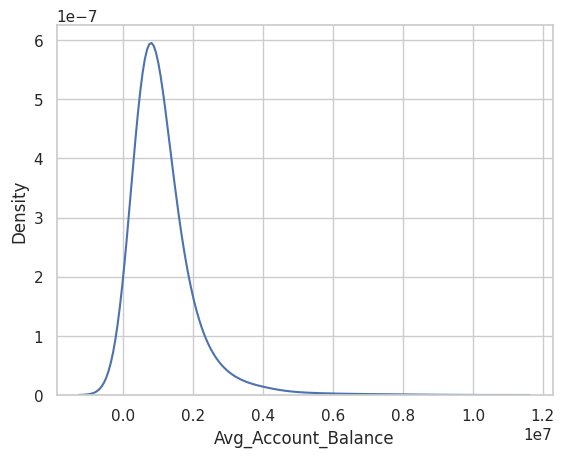

In [22]:
sns.set_style('whitegrid')
sns.kdeplot(Train_numerical['Avg_Account_Balance'], bw=0.5)
plt.show()

<ipython-input-23-36f8e6ffd1e2>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(Test_numerical['Avg_Account_Balance'], bw=0.5)


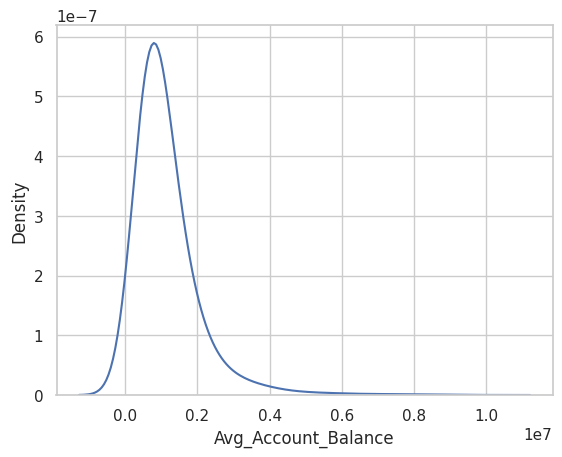

In [23]:
sns.set_style('whitegrid')
sns.kdeplot(Test_numerical['Avg_Account_Balance'], bw=0.5)
plt.show()

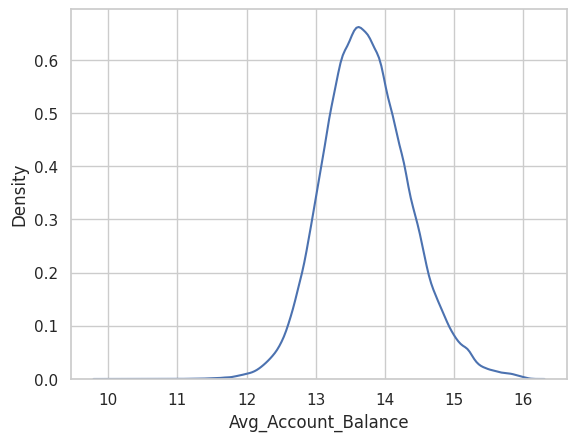

In [24]:
Train_numerical['Avg_Account_Balance'] = np.log(Train_numerical['Avg_Account_Balance'])
sns.kdeplot(Train_numerical['Avg_Account_Balance'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

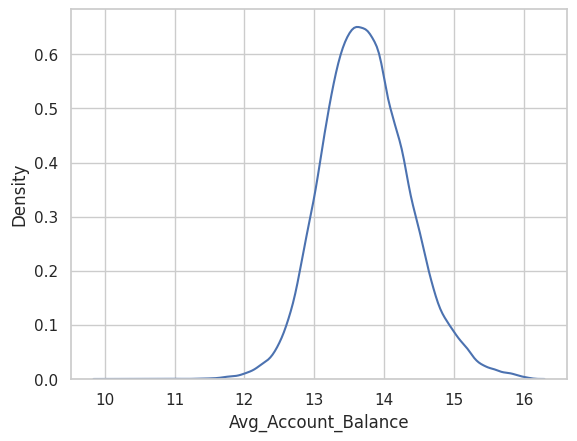

In [25]:
Test_numerical['Avg_Account_Balance'] = np.log(Test_numerical['Avg_Account_Balance'])
sns.kdeplot(Test_numerical['Avg_Account_Balance'])
plt.show

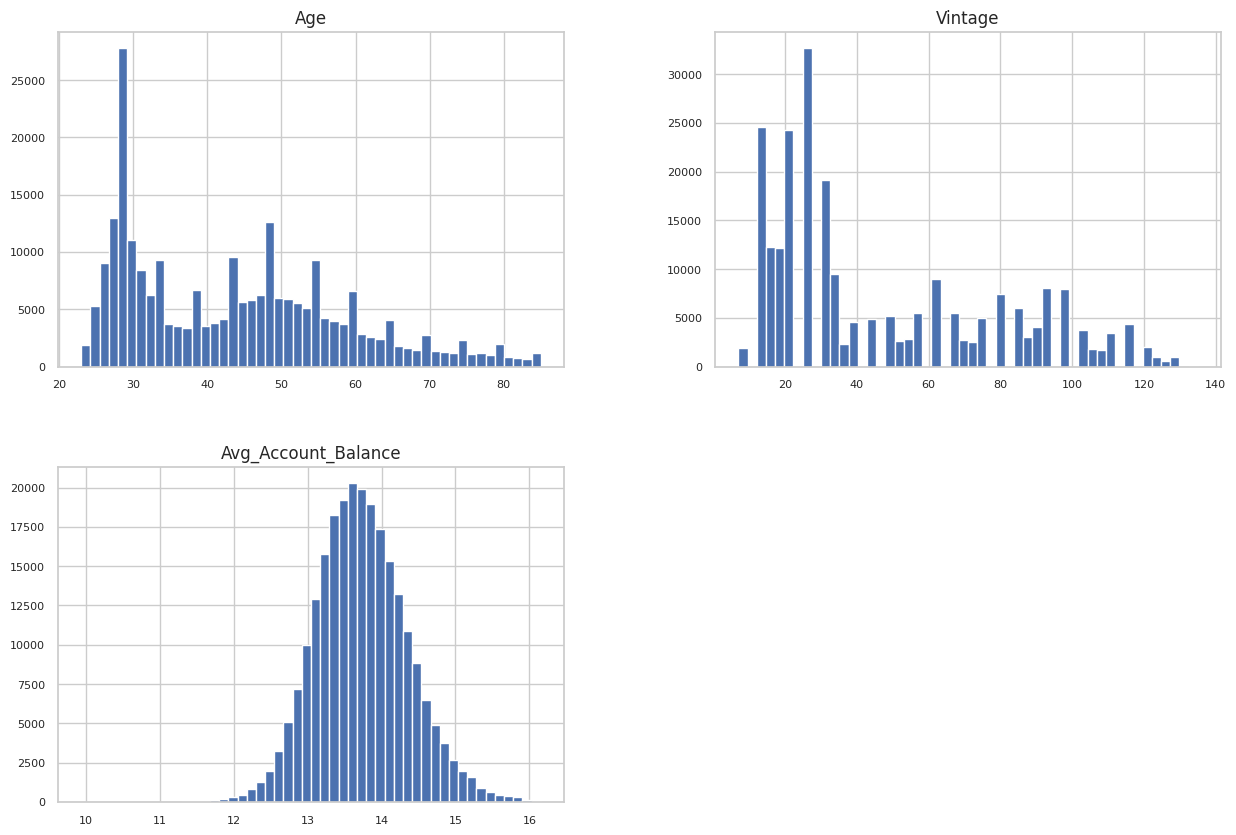

In [26]:
Train_numerical.hist(figsize=(15, 10), bins=50, xlabelsize=8, ylabelsize=8);

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Train_categorical = Train_categorical.apply(LabelEncoder().fit_transform)
Test_categorical = Test_categorical.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()

Train_numerical = scaler.fit_transform(Train_numerical.values)
Train_numerical = pd.DataFrame(Train_numerical, columns = col_names_Train)

Test_numerical = scaler.fit_transform(Test_numerical.values)
Test_numerical = pd.DataFrame(Test_numerical, columns = col_names_Test)

In [28]:
train_new_df = pd.concat([Train_categorical,pd.DataFrame(Train_numerical),Train_Is_Lead],axis=1)
test_new_df = pd.concat([Test_categorical,pd.DataFrame(Test_numerical)],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

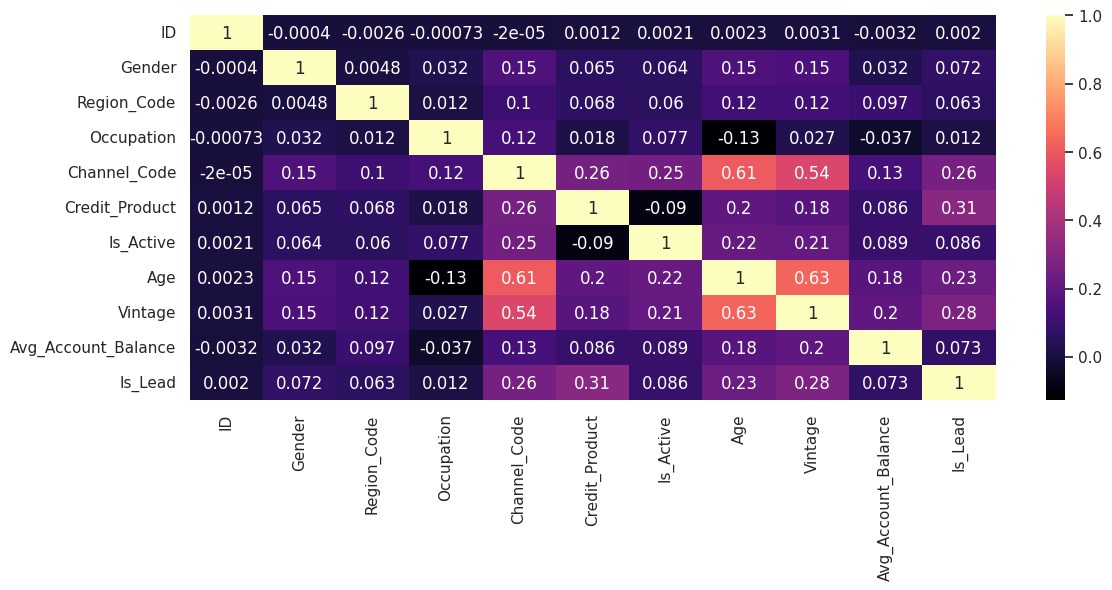

In [29]:
corr_train_df = train_new_df.corr()
plt.figure(figsize=(13,5))
sns.color_palette("magma", as_cmap=True)
ax = sns.heatmap(corr_train_df, annot=True, cmap="magma")
plt.show

In [30]:
train_new_df['Avg_Account_Balance'].agg(['skew', 'kurtosis']).transpose()

skew        0.235178
kurtosis    0.306033
Name: Avg_Account_Balance, dtype: float64

In [31]:
predictor_train = train_new_df.drop(['Is_Lead','ID'],axis=1)
predictor_test = test_new_df.drop(['ID'], axis =1)
target_train    = train_new_df['Is_Lead']

In [32]:
predictor_test.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age', 'Vintage', 'Avg_Account_Balance'],
      dtype='object')

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import xgboost
from lightgbm import LGBMClassifier

In [34]:

kf = KFold(n_splits=10, shuffle=True)

preds = list()
rocauc_score = []

for i, (train_idx, val_idx) in enumerate(kf.split(predictor_train)):

    X_train, y_train = predictor_train.iloc[train_idx, :], target_train.iloc[train_idx]
    X_val, y_val = predictor_train.iloc[val_idx, :], target_train.iloc[val_idx]

    print('\nFold: {}\n'.format(i+1))

    lg = LGBMClassifier(metric='auc',
                        n_estimators=50000,
                        bagging_fraction=0.95,
                        subsample_freq=2,
                        objective="binary",
                        importance_type="gain",
                        random_state=294,
                        num_leaves=300,
                        boosting_type='gbdt',
                        learning_rate=0.15,
                        max_depth=4,
                        scale_pos_weight=2,
                        n_jobs=-1,
                        early_stopping_rounds=100,
                        verbosity=100
                       )

    lg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

    roc_auc = roc_auc_score(y_val, lg.predict_proba(X_val)[:, 1])
    rocauc_score.append(roc_auc)
    preds.append(lg.predict_proba(predictor_test[predictor_test.columns])[:, 1])

y_pred_final = np.mean(preds, axis=0)
sample['Is_Lead'] = y_pred_final


Fold: 1

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Warning] bagging_fraction is set=0.95, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95
[LightGBM] [Info] Number of positive: 52484, number of negative: 168668
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.233011
[LightGBM] [Debug] init for col-wise cost 0.000010 seconds, init for row-wise cost 0.031870 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 2211

In [35]:
print('ROC_AUC - CV Score: {}'.format((sum(rocauc_score)/10)),'\n')
print("Score : ",rocauc_score)

ROC_AUC - CV Score: 0.8741951486591224 

Score :  [0.8714655985265967, 0.8748939916703652, 0.8731886380011075, 0.8727828989205474, 0.8761263663831508, 0.8773428747305175, 0.8716832050306158, 0.8775602467340173, 0.8763347546511027, 0.870572911943204]


In [36]:
display("sample_submmission",sample)
sub_file_name_1 = "Credit_Card_lead_Predication.csv"
sample.to_csv(sub_file_name_1,index=False)
sample.head(5)

'sample_submmission'

,ID,Is_Lead
0,VBENBARO,0.094628
1,CCMEWNKY,0.920889
2,VK3KGA9M,0.135320
3,TT8RPZVC,0.041121
4,SHQZEYTZ,0.043665
...,...,...
105307,DBENJOYI,0.985319
105308,CWQ72DWS,0.735491
105309,HDESC8GU,0.138934
105310,2PW4SFCA,0.382765


,ID,Is_Lead
0,VBENBARO,0.094628
1,CCMEWNKY,0.920889
2,VK3KGA9M,0.135320
3,TT8RPZVC,0.041121
4,SHQZEYTZ,0.043665
